# HW2
## Question 2
### Tim Demetriades
#### Principle Component Analysis | Dimension Reduction | Eigenfaces
Face modelling serves as one of the most fundamental problems in modern artificial intelligence and
computer vision, and can be useful in various applications like face recognition, identification etc.
However, face images are usually of high-dimensional (e.g., a small 100 ×100 gray-scaled face image
has dimension 100 ×100 = 10, 000), therefore, find a suitable representation is utterly important.
In this problem, we apply the linear model, principal component analysis (PCA), on face images
to reduce the dimension and obtain eigenface representations.

**Dataset**: we use the dataset† which contains 177 face images. Each image contains 256 ×256
pixels and is gray-scaled (i.e., the value for each pixel is stored as unsigned integer between [0, 255],
typically, 0 is taken to be black and 255 is taken to be white). You need to split the dataset to be
train/test set, e.g., you could use the first 157 images for training, and the rest 20 faces for testing.

#### (1) Write the PCA codes to compute K = 30 eigenfaces and visualize the top 10 eigen-faces.

First let's import the needed modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path

from sklearn.model_selection import train_test_split
from PIL import Image

We specify the folder with the images and count how many images are in the folder.

In [2]:
image_folder = r'face_data'
num_images = len([name for name in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, name))])

Here is the first image.

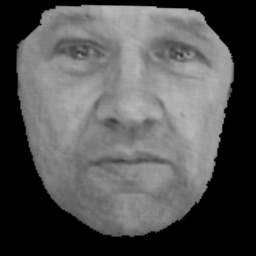

In [3]:
# Show first image
image = Image.open(os.path.join(image_folder, 'face000.bmp'))
image

Let's create a list of all the images.

In [4]:
# Create list of face images
images = []
for i in range(num_images):
    file = os.listdir(image_folder)
    image_path = os.path.join(image_folder, file[i])
    image = np.array(Image.open(image_path)).reshape(256 * 256)
    images.append(image)

Here we create a numpy array of the list of images. 

In [5]:
# Create np array of list of face images
images = np.array(images)

In [6]:
images.shape

(177, 65536)

Let's make a function to show the first 25 images.

In [7]:
# Show some images
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(256, 256), cmap='gray')
    plt.show()

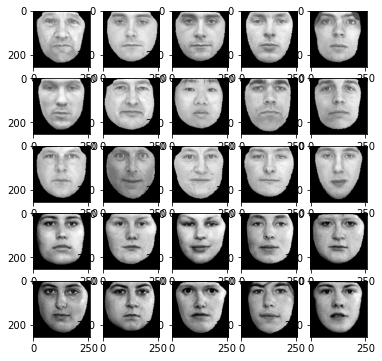

In [8]:
plot_faces(images)

Here we use PIL to display the first 10 images.

In [9]:
# Using PIL to display first 10 images
def visualize_images(images, cols, rows):
    visualize = Image.new('L', (256*cols, 256*rows))    # create base image big enough to hold top 10 images

    ct = 0
    row_inc = 0
    col_inc = 0

    for i in range(images.shape[0]):    # first column is num of images
        ct += 1
        img = Image.fromarray(images[i, :].reshape([256, 256]))    # each image (reshaped)
        visualize.paste(img, (col_inc, row_inc))    # put image in base image starting at top left
        col_inc += 256
        if ct % 5 == 0:    # after 5 images move down to next row
            row_inc += 256
            col_inc = 0
    return visualize

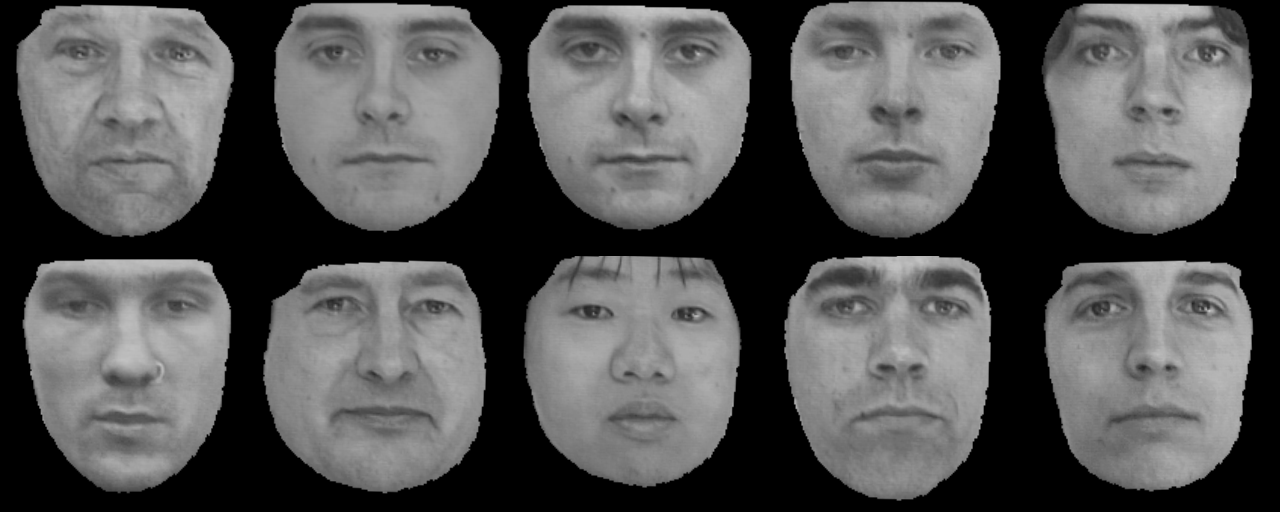

In [10]:
visualize_training = visualize_images(images, cols=5, rows=2)
visualize_training

We split the 177 images into 157 training images and 20 test images.

In [11]:
# Split images into train and test
train_images, test_images = train_test_split(images, test_size=20)
# Convert from int to float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

For PCA, we need to subtract the mean image from each training image. To get the mean image, we just sum up all the training images and divide it by the number of training images. We can use the numpy *.mean()* method.

In [12]:
# Calculate mean image
pixels_per_image = train_images.shape[1]    # 65536 pixels per image
num_train_images = len(train_images)        # 157 training images
mean_image = np.zeros(pixels_per_image)     # initialize vector with zeroes
mean_image = np.mean(train_images, axis=0)  # 0 is the row axis

**Here is what the mean image looks like.**

In [13]:
visualize_mean = Image.new('L', (256, 256))    # create base image big enough to hold top 10 images
mean_img = Image.fromarray(mean_image.reshape([256, 256]))    # each image (reshaped)
visualize_mean.paste(mean_img)    # put image in base image starting at top left

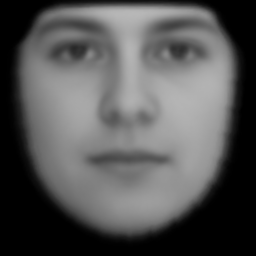

In [14]:
visualize_mean

Next, we subtract the mean image from each training image to obtain matrix **X**, the centered train images.

In [15]:
# Subtract mean image from each image to obtain X
X = np.copy(train_images)    # initialize array X with train_images array
for n in range(num_train_images):
    X[n] = np.subtract(X[n], mean_image)

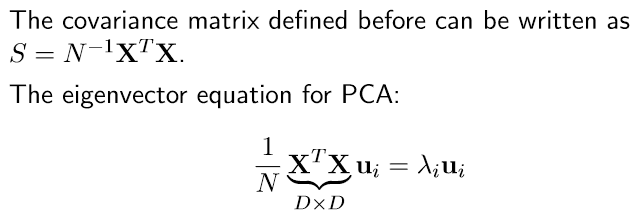

Now that we have matrix **X**, we can obtain the covariance matrix S using the formula above. However, this matrix will be very large (DxD), so we can use a trick to make this smaller (NxN) and more efficient.

Multiple both sides by **X** to go from a DxD matrix to an NxN matrix. 

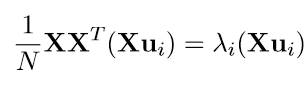

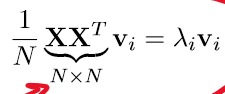

In [16]:
S = (np.matmul(X, X.T)) / num_train_images    # covariance matrix (dimensions = NxN)

In [17]:
S.shape

(157, 157)

Here we do the eigendecomposition to get the eigen values and eigenvectors v_i.

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(S)

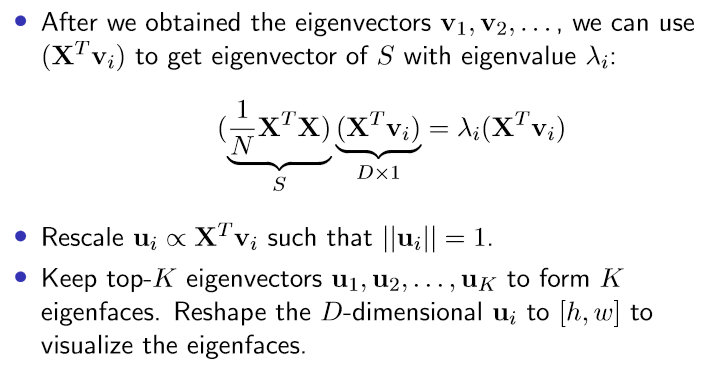

We pick the top k=30 eigenvectors and project them (dot product) onto **X** transpose, the centered train images (the train images minus the mean image), to get the eigenfaces.

In [19]:
X.T.shape

(65536, 157)

In [20]:
eigenvectors.shape

(157, 157)

In [21]:
# Make sure the eigenvalues and corresponding eigenvectors are sorted from largest to smallest
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [22]:
k = 30    # top 30 eigenfaces
eigenfaces = []
for i in range(k):
    eigenfaces.append(np.matmul(X.T, eigenvectors[i]))

Let's create a numpy array from the list of eigenfaces.

In [23]:
# Create an np array from the eigenfaces list
eigenfaces = np.array(eigenfaces)

In [24]:
eigenfaces.shape

(30, 65536)

We should now normalize the eigenfaces.

**Normalization Formula**

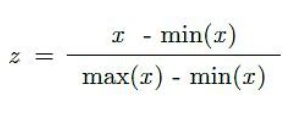

In [25]:
# Normalize pixel values between 0 and 255 so we can display them accurately
eigenfaces_normalized = ((eigenfaces.T - eigenfaces.min(axis=1)) / (eigenfaces.max(axis=1) - eigenfaces.min(axis=1)) * 255).T

In [26]:
print(eigenfaces_normalized.min())
print(eigenfaces_normalized.max())

0.0
255.0


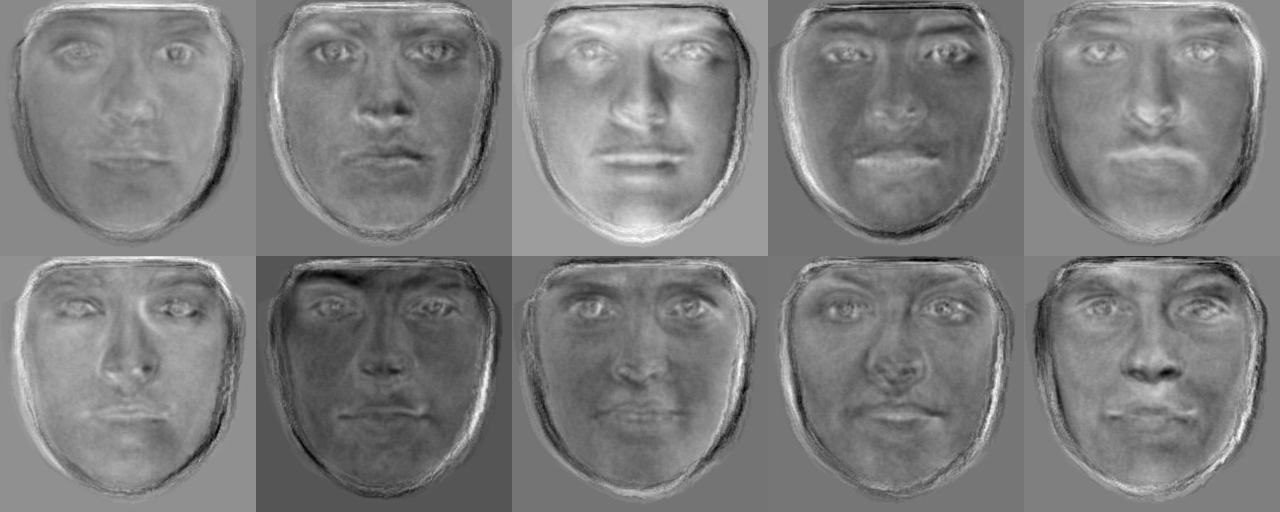

In [27]:
visualize_eigenfaces = visualize_images(eigenfaces_normalized, cols=5, rows=2)
visualize_eigenfaces

**Above are the top 10 eigenfaces.**

Lastly, we normalize the magnitudes of the eigenvectors to 1.

In [28]:
# Normalize magnitudes of eigenvectors to 1
for i in range(eigenfaces.shape[0]):
    eigenfaces[i, :] = eigenfaces[i, :] / np.linalg.norm(eigenfaces[i, :])

In [29]:
# Show that norm is now 1
np.linalg.norm(eigenfaces[0, :])

0.9999999

#### (2) Use the learned K eigenfaces from (1) to reconstruct testing images, and record the reconstruction error. The reconstruction error can be defined as ||ˆY−Y||2 N , where ˆY is the reconstructed face using the learned eigenfaces, Y is the testing faces and N is the total number of testing data. Please show 5 testing images and their reconstructed ones.

Here is the first 5 test images.

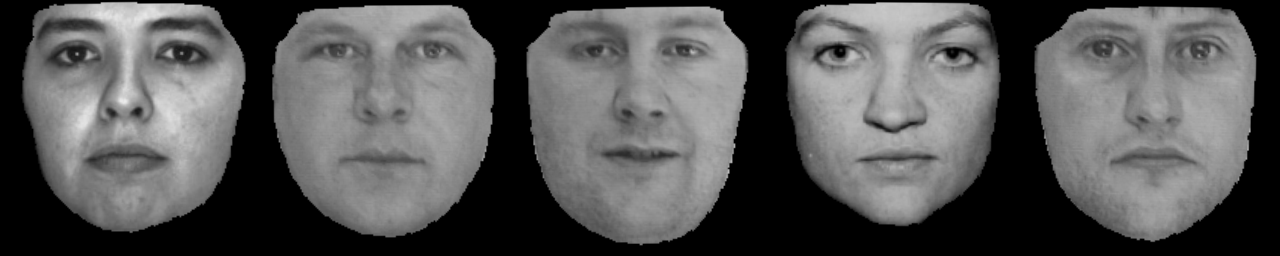

In [30]:
# Show first 5 test images
visualize_test = visualize_images(test_images, cols=5, rows=1)
visualize_test

We have W=(v1, v2, ... , vk) which contains K eignefaces that forms the new coordinated system.

Let's take the test images and **center** them by subtracting the mean image from each.

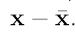

In [31]:
# Subtract mean image from each image to center test images
num_test_images = len(test_images)
centered_test_images = np.copy(test_images)    # initialize array with test_images array
for n in range(num_test_images):
    centered_test_images[n] = np.subtract(centered_test_images[n], mean_image)

Let's now project the centered images onto the eigenfaces by doing the dot product of the centered test images and the vector W which contains the K eigenfaces. We are essentially projecting the centered test images onto a new coordinate system.

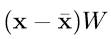

In [32]:
eigenfaces.shape

(30, 65536)

In [33]:
centered_test_images.shape

(20, 65536)

We can now **project** the centered test images onto the k eigenfaces obtained from the training images.

In [34]:
# Get projected test eigenfaces by getting dot product of centered test images and eigenfaces
projected_test_eigenfaces = np.matmul(centered_test_images, eigenfaces.T)

In [35]:
projected_test_eigenfaces.shape

(20, 30)

We can get the approximate centered test eigenfaces by multiplying by the eigenfaces transposed.

In [36]:
# Do dot product of projected test eigenfaces and the eigenfaces transpose
approximate_centered_test_eigenfaces = np.matmul(projected_test_eigenfaces, eigenfaces)

In [37]:
approximate_centered_test_eigenfaces.shape

(20, 65536)

Finally, we add back the mean image to obtain the **approximation/reconstruction for the test images**.



In [38]:
# Get reconstructed images by adding back the mean image
reconstructed_images = np.zeros((num_test_images, pixels_per_image))    # initialize matrix with zeros
for n in range(num_test_images):
    reconstructed_images[n] = np.add(approximate_centered_test_eigenfaces[n], mean_image)

In [39]:
reconstructed_images.shape

(20, 65536)

Let's now show some restructed images and their corresponding test images.

In [40]:
# Normalize pixel values between 0 and 255
reconstructed_images_normalized = ((reconstructed_images.T - reconstructed_images.min(axis=1)) / (reconstructed_images.max(axis=1) - reconstructed_images.min(axis=1)) * 255).T

Here we show that it's now normalized by comparing the current min and max pixel value to the original.

In [41]:
print(reconstructed_images_normalized.min())
print(reconstructed_images_normalized.max())

0.0
255.0


In [42]:
print(reconstructed_images.min())
print(reconstructed_images.max())

-584.3876342773438
767.974609375


**Below are the first 5 reconstructed test images and the corresponding test images.**

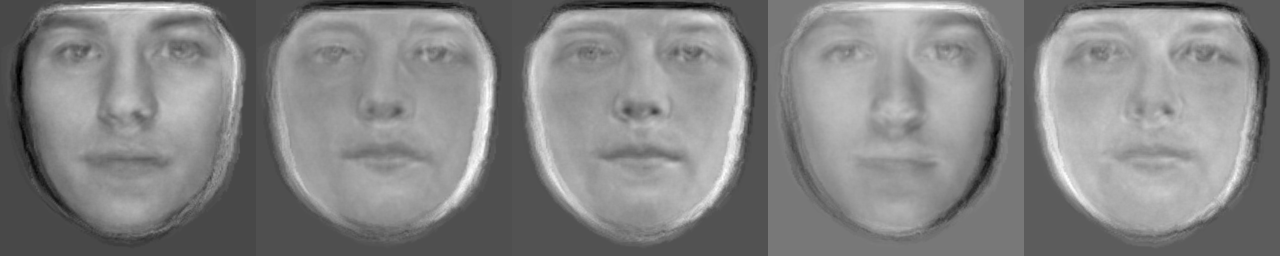

In [43]:
# Show first 5 reconstructed images and corresponding test images
visualize_reconstructed = visualize_images(reconstructed_images_normalized, cols=5, rows=1)
visualize_reconstructed

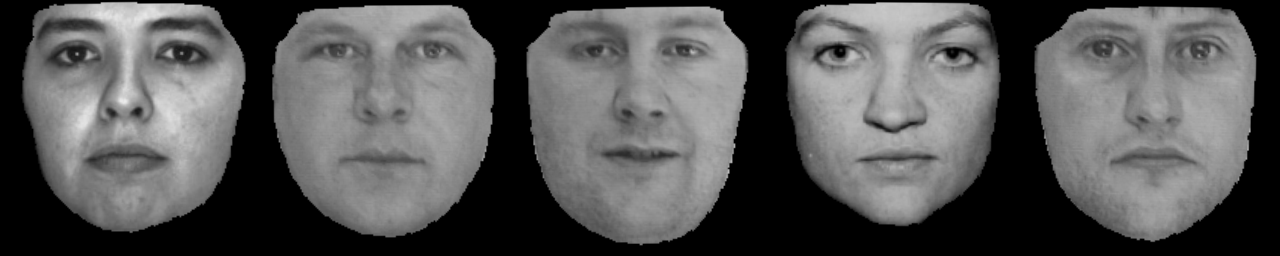

In [44]:
# Show first 5 test images
visualize_test = visualize_images(test_images, cols=5, rows=1)
visualize_test

Let's compute the reconstruction error using the reconstructed faces (obtained from the learned eigenfaces) and the testing faces.

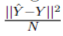

We'll take the sum of the squared differences and divide by the number of test images.

In [45]:
#(((reconstructed_images - test_images)**2).mean(axis=0)).mean(axis=0)

In [46]:
reconstructed_error = (np.linalg.norm(reconstructed_images - test_images)**2) / (num_test_images)

In [47]:
reconstructed_error

201510654.94788283

Above we can see that the **reconstructed error obtained is 299,171,727**. This number is not very useful unless we can compare it to other numbers. Let's try different values of K and see if we can create a plot of the value of K vs the reconstructed error.

#### (3) Try different values of K, e.g., try K = 10, 30, 50, 100, 150..., and draw the curve to indicate the corresponding testing reconstruction errors. The x-axis of the curve can be different K values, and the y-axis can be testing reconstruction error defined in (2).

In [48]:
# Function to create reconstructed images from top K eigenfaces
def eigenface_reconstruction(k_value):
    print(f"Reconstructing with top {k_value} eigenfaces.")
    k = k_value    # top k eigenfaces
    
    # Get top k eigenfaces by projecting centered train images onto the eigenvectors
    eigenfaces = []
    for i in range(k):
        eigenfaces.append(np.matmul(X.T, eigenvectors[i]))

    # Create an np array from the eigenfaces list
    eigenfaces = np.array(eigenfaces)

    # Normalize magnitudes of eigenvectors to 1
    for i in range(eigenfaces.shape[0]):
        eigenfaces[i, :] = eigenfaces[i, :] / np.linalg.norm(eigenfaces[i, :])

    # Get projected test eigenfaces by getting dot product of centered test images and eigenfaces
    projected_test_eigenfaces = np.matmul(centered_test_images, eigenfaces.T)

    # Do dot product of projected test eigenfaces and the eigenfaces transpose
    approximate_centered_test_eigenfaces = np.matmul(projected_test_eigenfaces, eigenfaces)

    # Get reconstructed images by adding back the mean image
    reconstructed_images = np.zeros((num_test_images, pixels_per_image))    # initialize matrix with zeros
    for n in range(num_test_images):
        reconstructed_images[n] = np.add(approximate_centered_test_eigenfaces[n], mean_image)
    
    # Return the reconstructed images matrix
    return reconstructed_images

In [49]:
reconstructed_images_10 = eigenface_reconstruction(10)
reconstructed_images_30 = eigenface_reconstruction(30)
reconstructed_images_50 = eigenface_reconstruction(50)
reconstructed_images_100 = eigenface_reconstruction(100)
reconstructed_images_150 = eigenface_reconstruction(150)

Reconstructing with top 10 eigenfaces.
Reconstructing with top 30 eigenfaces.
Reconstructing with top 50 eigenfaces.
Reconstructing with top 100 eigenfaces.
Reconstructing with top 150 eigenfaces.


In [50]:
def calculate_reconstructed_error(reconstructed_images):
    return (np.linalg.norm(reconstructed_images - test_images)**2) / (num_test_images)

In [51]:
reconstructed_error_10 = calculate_reconstructed_error(reconstructed_images_150)
reconstructed_error_30 = calculate_reconstructed_error(reconstructed_images_100)
reconstructed_error_50 = calculate_reconstructed_error(reconstructed_images_50)
reconstructed_error_100 = calculate_reconstructed_error(reconstructed_images_30)
reconstructed_error_150 = calculate_reconstructed_error(reconstructed_images_10)

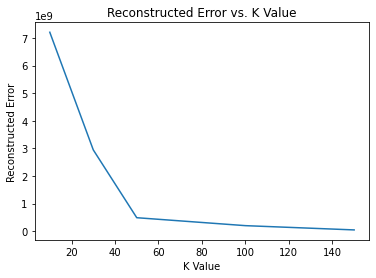

In [52]:
# Plot reconstruction error vs K value
x_axis = [10, 30, 50, 100, 150]
y_axis = [reconstructed_error_10, reconstructed_error_30, reconstructed_error_50, reconstructed_error_100, reconstructed_error_150]

plt.xlabel('K Value')
plt.ylabel('Reconstructed Error')
plt.title('Reconstructed Error vs. K Value')

plt.plot(x_axis, y_axis)
plt.show()

Above you can see the **reconstructed error decreases as the value of K increases**. This makes sense because as the value of K increases, more features and subsequently more information is provided to the test images, allowing them to be more accurate and therefore have a lower reconstruction error. You can see from the plot that around K=50 there is a sharp change in slope, which might mean that 50 eigenfaces are enough to get a solid reconstruction and any more used will not be much more helpful.